# Linear Discriminant Analysis (LDA)
- The covariance matrix can tell us about the scatter within a dataset, which is the amount of spread that there is within the data. The way to find this scatter is to multiply
the covariance by the $p_c$ , the probability of the class (that is, the number of datapoints
there are in that class divided by the total number). Adding the values of this for all of the
classes gives us a measure of the **within-class scatter** of the dataset:

\begin{equation}
S_W = \sum_{c \in classes} \sum_{j \in c} p_c(x_j - \mu_c)(x_j - \mu_c)^T .
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
Ndata = np.shape(data)[0]
Sw = np.zeros((4, 4))
sb = 0
mc = np.mean(data, axis=0)

C = np.cov(np.transpose(data))
# Loop over classes
classes = np.unique(labels)
for i in range(len(classes)):
# Find relevant datapoints
    indices = np.squeeze(np.where(labels==classes[i]))
    d = np.squeeze(data[indices,:])
    classcov = np.cov(d.T)
    Sw += np.float(np.shape(indices)[0])/Ndata * classcov
    m = np.mean(d, axis=0)
    sb += np.dot( (m-mc).reshape(4,1) , (m-mc).reshape(1,4) )/3
    print 'Sw: \n',Sw

print 'sb\n',sb,'\n'
print C - Sw

Sw: 
[[0.04141633 0.03343265 0.00537959 0.00351565]
 [0.03343265 0.0483932  0.00389388 0.00381224]
 [0.00537959 0.00389388 0.01003537 0.00189932]
 [0.00351565 0.00381224 0.00189932 0.00383129]]
Sw: 
[[0.13022721 0.06182721 0.06634558 0.02210884]
 [0.06182721 0.08121633 0.0314449  0.01754694]
 [0.06634558 0.0314449  0.08364082 0.02626667]
 [0.02210884 0.01754694 0.02626667 0.01686667]]
Sw: 
[[0.26500816 0.09308163 0.16744218 0.03847347]
 [0.09308163 0.11588435 0.0552381  0.03342313]
 [0.16744218 0.0552381  0.18517007 0.0425415 ]
 [0.03847347 0.03342313 0.0425415  0.04201088]]
sb
[[ 0.42141422 -0.13022667  1.10109778  0.47575378]
 [-0.13022667  0.073184   -0.37370133 -0.14994933]
 [ 1.10109778 -0.37370133  2.91095822  1.24605422]
 [ 0.47575378 -0.14994933  1.24605422  0.53736089]] 

[[ 0.42068535 -0.13235009  1.10624015  0.47843033]
 [-0.13235009  0.07211967 -0.37695085 -0.15140434]
 [ 1.10624015 -0.37695085  2.92800935  1.25384598]
 [ 0.47843033 -0.15140434  1.25384598  0.54040343]]


If our dataset is easy to separate into classes, then this within-class scatter should be
small, so that each class is tightly clustered together. However, to be able to separate the
data, we also want the distance between the classes to be large. This is known as the **between-
classes scatter** and is a significantly simpler computation, simply looking at the difference
in the means:

\begin{equation}
S_B = \sum_{c \in classes} (\mu_c - \mu)(\mu_c - \mu)^T .
\end{equation}


In [3]:
Sb = C - Sw

The argument about good separation suggests that datasets that are easy to separate into the different classes
should have  $S_B /S_W$ as large as possible.

The projection of
the data can be written as $z = w^T \cdot x$ for datapoint $x$. 

Replacing $x_j$ with $w^T \cdot x_j$, we can use some linear algebra to get:

\begin{equation}
\sum_{c \in classes} \sum_{j \in c}
p_c(w^T \cdot (x_j - \mu_c))(w^{T} \cdot (x_j - \mu_c))^T = w^T S_W w
\end{equation}

\begin{equation}
\sum_{c \in classes}
w^T (\mu_c - \mu)(\mu_c - \mu)^Tw = w^T S_B w .
\end{equation}

So our ratio of within-class and between-class scatter looks like:

\begin{equation}
\frac{w^T S_W w}{w^T S_B w}.
\end{equation}

In order to find the maximum value of this with respect to $w$, we differentiate it and set
the derivative equal to 0. This tells us that:

\begin{equation}
\frac{S_B w(w^TS_W w)-S_W w(w^T S_B w)}{(w^T S_W w)^2}S_B w = 0 .
\end{equation}

So we just need to solve this equation for w and we are done. We start with a little bit
of rearranging to get:

\begin{equation}
S_Ww = \frac{w^T S_W w}{w^T S_B w}S_B w.
\end{equation}

Finding the minimum requires computing the generalised eigenvectors of $S_W^{-1} S_B$

In [4]:
evals,evecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
print np.linalg.inv(Sw).dot(Sb)

[[ -2.99753234   1.03446995  -7.91107272  -3.37888911]
 [ -5.54545658   2.11017676 -14.90561732  -6.29698729]
 [  7.92118614  -2.82697492  21.06840824   8.97631876]
 [ 10.52401558  -3.36743571  27.61482325  11.87787436]]


In [5]:
print evecs.dot(np.linalg.inv(Sw).dot(Sb)).dot(evecs.T)

[[ 19.36739692   1.90793526  -7.45325919 -15.59113551]
 [ -4.57143335  -0.33690072   1.77846921   3.80794739]
 [ -8.90087313  -0.84024502   3.42328384   7.20521713]
 [ 15.4052517    1.49874302  -5.92678847 -12.44453673]]


In [6]:
print evecs.T.dot(Sb).dot(evecs)/evecs.T.dot(Sw).dot(evecs)

[[ 3.18253543e+01  6.95652174e+00 -3.20000000e+01 -0.00000000e+00]
 [ 7.57038123e+00  2.60418315e-01  1.42224013e-01  2.12365591e-01]
 [-5.00312500e+01  1.40650141e-01 -1.34228188e-02 -1.34228188e-02]
 [-1.92857143e+00  2.72255068e-01 -1.34228188e-02 -1.34228188e-02]]


In [7]:
evals

array([ 3.18253543e+01,  2.60418315e-01, -1.34228188e-02, -1.34228188e-02])

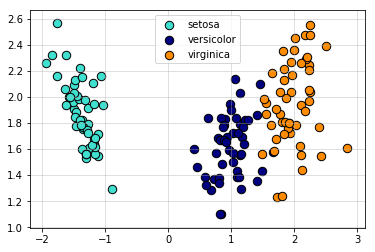

In [8]:
evals,evecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
w = evecs[:,:2]
n = np.dot(data,w)

colors = ['turquoise', 'navy', 'darkorange']

for i, c,label in zip(target_ids, colors, iris.target_names):
    plt.scatter(n[i == labels, 0], n[i == labels, 1], c = c, edgecolors='black', s=285,label=label, marker='.')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

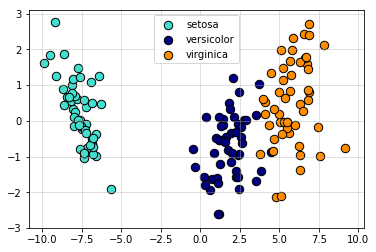

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

X = iris.data
y = iris.target

lda = lda(n_components=2)
X_lda = lda.fit(X, y).transform(X)
for i, c, label in zip(target_ids, colors,iris.target_names):
    plt.scatter(X_lda[i == labels, 0], X_lda[i == labels, 1], c = c, edgecolors='black', s=285,label=label, marker='.')
plt.grid(alpha=0.5)
plt.legend()
plt.show()